<a href="https://colab.research.google.com/github/Mehvishh25/CODSOFT_Machine-Learning/blob/main/Codsoft_sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [ ]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5270,ham,Did u fix the teeth?if not do it asap.ok take ...,NaN,NaN,NaN
335,ham,"Ta-Daaaaa! I am home babe, are you still up ?",NaN,NaN,NaN
1880,ham,Just seeing your missed call my dear brother. ...,NaN,NaN,NaN
447,ham,I wont get concentration dear you know you are...,NaN,NaN,NaN
4069,ham,Ok i wont call or disturb any one. I know all ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5225,ham,Smile in Pleasure Smile in Pain Smile when tro...
4312,ham,"I wasn't well babe, i have swollen glands at m..."
946,spam,Ur cash-balance is currently 500 pounds - to m...
4507,ham,Not able to do anything.
3449,ham,Ya just telling abt tht incident..


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.target.value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7e8a9fd50df0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

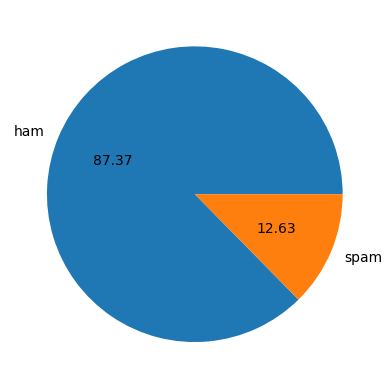

In [ ]:
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%.2f')

In [ ]:
y=df.iloc[:,0]
x=df.iloc[:,1]

In [ ]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = ' '.join(text.split())
    return text
x = x.apply(cleaning_text)

In [ ]:
x

,text
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup final ...
3,u dun say so early hor u c already then say
4,nah i don t think he goes to usf he lives arou...
...,...
5567,this is the nd time we have tried contact u u ...
5568,will b going to esplanade fr home
5569,pity was in mood for that so any other suggest...
5570,the guy did some bitching but i acted like i d...


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred=lr.predict(X_test_tfidf)

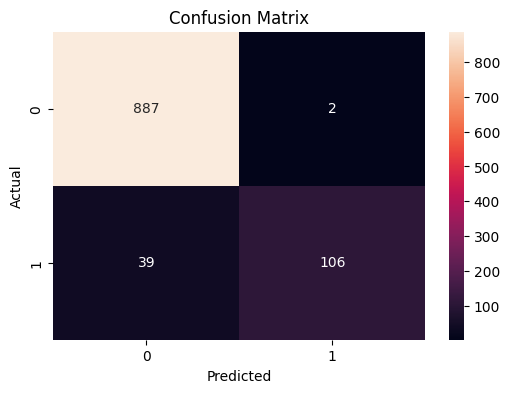

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Accuracy:  0.960348162475822
Precision:  0.9814814814814815
Recall:  0.7310344827586207
F1 Score:  0.8379446640316206


In [ ]:
model2=MultinomialNB()
model2.fit(X_train_tfidf,y_train)
y_pred2=model2.predict(X_test_tfidf)

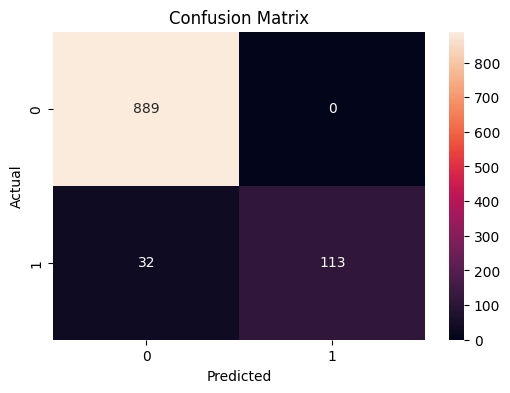

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('Accuracy: ',accuracy_score(y_test, y_pred2))
print('Precision: ',precision_score(y_test, y_pred2))
print('Recall: ',recall_score(y_test, y_pred2))
print('F1 Score: ',f1_score(y_test, y_pred2))

Accuracy:  0.9690522243713733
Precision:  1.0
Recall:  0.7793103448275862
F1 Score:  0.875968992248062


In [ ]:
model3=SVC(kernel='linear')
model3.fit(X_train_tfidf,y_train)
y_pred3=model3.predict(X_test_tfidf)

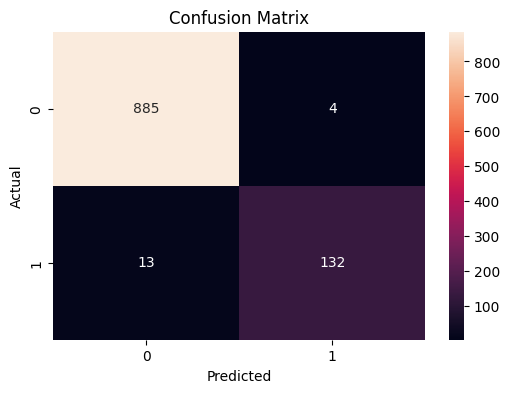

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('Accuracy: ',accuracy_score(y_test, y_pred3))
print('Precision: ',precision_score(y_test, y_pred3))
print('Recall: ',recall_score(y_test, y_pred3))
print('F1 Score: ',f1_score(y_test, y_pred3))

Accuracy:  0.9835589941972921
Precision:  0.9705882352941176
Recall:  0.9103448275862069
F1 Score:  0.9395017793594306


The best model whick works here is Support Vector Machine